In [1]:
cs_path = r'C:\Users\huda\Downloads\comparison_c_sharp\comparison_c_sharp'
base_path = r'C:\Users\huda\Downloads\final\final\\'
benchmark_base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\external_test_data\FJSSPinstances\\'
files = ['s0_s1_3600.txt','s4_3600.txt','s5_s6_s3_3600.txt', 's2a_3600.txt', 's2b_3600.txt', 's2c_s2d_3600.txt', 'behnke_geiger_repeat.txt', 'chambers.txt', 'dppaulli.txt', 'fattahi.txt', 'behnkegeiger.txt', 'brandimarte.txt', 'flexible_instances.txt']

In [2]:
def translate(content, limit):
    line = dict()
    line['source'] = content[0]
    line['instance'] = int(content[1])
    line['best_objective'] = float(content[6])
    line['generations'] = int(content[4])
    line['restarts'] = int(content[5])
    line['n_explored'] = int(float(content[3]))
    line['runtime'] = float(content[2])

    return line    

In [3]:
py_data = []
for file in files:
    content = open(base_path + file, 'r').readlines()
    for values in content:
        line = translate(values.split(';'), 3600)
        py_data.append(line)

In [4]:
def create_average_dict(data, language):
    average = dict()
    for entry in data:
        key = str(entry['source']) + str(entry['instance'])
        if key not in average:
            average[key] = {'language': language, 'runtime': 0, 'fitness': 0.0, 'restarts': 0, 'generations': 0, 'fevals': 0, 'source': entry['source'], 'instance': entry['instance'], 'experiment_count': 0}
        average[key]['runtime'] = average[key]['runtime'] + entry['runtime']
        average[key]['fitness'] = average[key]['fitness'] + entry['best_objective']
        average[key]['generations'] = average[key]['generations'] + entry['generations']
        average[key]['fevals'] = average[key]['fevals'] + entry['n_explored']
        average[key]['experiment_count'] = average[key]['experiment_count'] + 1
    for instance in average:
        average[instance]['runtime'] = average[instance]['runtime'] / average[instance]['experiment_count']
        average[instance]['fitness'] = average[instance]['fitness'] / average[instance]['experiment_count']
        average[instance]['generations'] = average[instance]['generations'] / average[instance]['experiment_count']
        average[instance]['fevals'] = average[instance]['fevals'] / average[instance]['experiment_count']
    return average


In [5]:
py_average = create_average_dict(py_data, 'py')

In [6]:
cs_data = []
import os
import json
for filename in os.listdir(cs_path):
   with open(os.path.join(cs_path, filename), 'r') as f:
      all_data = json.load(f)
      name = filename.split('_')
      source = name[0]+'_'+name[1]
      instance = int(name[2])
      fitness = float(all_data['Result']['Fitness']['Makespan'])
      generations = int(all_data['Result']['Generations'])
      fevals = int(all_data['Result']['FunctionEvaluations'])
      runtime = float(all_data['Result']['TimeInSeconds'])
      required = {'source': source, 'instance': instance, 'best_objective': fitness, 'generations': generations, 'n_explored': fevals, 'runtime': runtime}
      cs_data.append(required)



In [7]:
cs_average = create_average_dict(cs_data, 'cs')

In [8]:
import pandas as pd
import seaborn as sns
cs_df = pd.DataFrame.from_dict(cs_average).T
py_df = pd.DataFrame.from_dict(py_average).T
df = pd.concat([cs_df.assign(dataset='cs'), py_df.assign(dataset='py')])

In [15]:
py_df.loc['0_BehnkeGeiger10']

language                        py
runtime                3624.849568
fitness                 142.047619
restarts                         0
generations            2355.952381
fevals              1983881.190476
source              0_BehnkeGeiger
instance                        10
experiment_count                21
Name: 0_BehnkeGeiger10, dtype: object

In [9]:
df.head()

,language,runtime,fitness,restarts,generations,fevals,source,instance,experiment_count,dataset
0_BehnkeGeiger10,cs,3600.760156,148.0,0,25381.5,40026862.0,0_BehnkeGeiger,10,20,cs
0_BehnkeGeiger11,cs,3601.601555,398.8,0,10051.9,15492019.0,0_BehnkeGeiger,11,20,cs
0_BehnkeGeiger12,cs,3601.353019,370.0,0,10211.95,15709042.0,0_BehnkeGeiger,12,20,cs
0_BehnkeGeiger13,cs,3602.332518,389.75,0,10209.2,15717045.0,0_BehnkeGeiger,13,20,cs
0_BehnkeGeiger14,cs,3602.032433,397.5,0,9947.85,15316450.0,0_BehnkeGeiger,14,20,cs


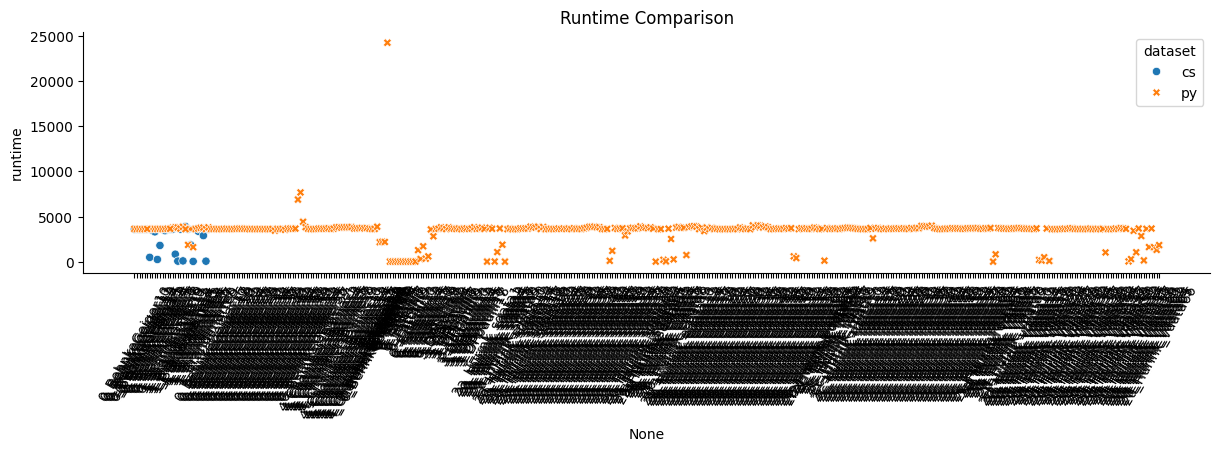

In [73]:
fg = sns.FacetGrid(data=df, aspect=4)
sns.scatterplot(x=df.index, y='runtime', data=df, hue='dataset', style='dataset').set(title='Runtime Comparison')
fg.set_xticklabels(rotation=60)

In [30]:
# there's probably a way easier way of doing this
data = []
for index, row in py_df.iterrows():
    try:
        cs_df.loc[index]
        data.append(row)
        data.append(cs_df.loc[index])
    except:
        pass


In [33]:
both_df = pd.DataFrame(data)

In [34]:
both_df.head()

,language,runtime,fitness,restarts,generations,fevals,source,instance,experiment_count
1_Brandimarte1,py,1858.443082,40.00000,0,1566.809524,1.389640e+06,1_Brandimarte,1,21
1_Brandimarte1,cs,3601.955192,41.95000,0,4789.600000,7.213833e+06,1_Brandimarte,1,20
1_Brandimarte2,py,3620.159523,26.47619,0,3134.666667,3.608032e+06,1_Brandimarte,2,21
1_Brandimarte2,cs,1856.165681,26.10000,0,19428.400000,3.063752e+07,1_Brandimarte,2,20
1_Brandimarte3,py,1604.102675,204.00000,0,908.047619,3.490690e+05,1_Brandimarte,3,21


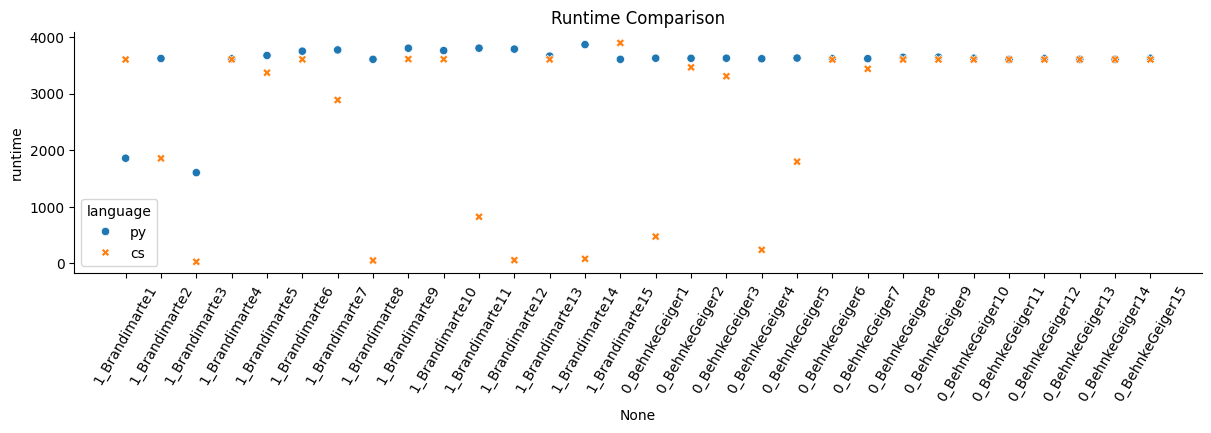

In [72]:
fg = sns.FacetGrid(data=both_df, aspect=4)
sns.scatterplot(x=both_df.index, y='runtime', data=both_df, hue='language', style='language').set(title='Runtime Comparison')
fg.set_xticklabels(rotation=60)

In [38]:
difference = dict()
for index, row in both_df.iterrows():
    if index not in difference:
        difference[index] = {'runtime': 0.0, 'fitness': 0.0, 'restarts': 0.0, 'generations': 0.0, 'fevals': 0.0, 'source': row['source'], 'instance': row['instance']}
    difference[index]['runtime'] = py_df.loc[index]['runtime'] - cs_df.loc[index]['runtime']
    difference[index]['fitness'] = py_df.loc[index]['fitness'] - cs_df.loc[index]['fitness']
    difference[index]['restarts'] = py_df.loc[index]['restarts'] - cs_df.loc[index]['restarts']
    difference[index]['generations'] = py_df.loc[index]['generations'] - cs_df.loc[index]['generations']
    difference[index]['fevals'] = py_df.loc[index]['fevals'] - cs_df.loc[index]['fevals']

In [42]:
diff_df = pd.DataFrame.from_dict(difference).T

In [43]:
diff_df.head()

,runtime,fitness,restarts,generations,fevals,source,instance
1_Brandimarte1,-1743.51211,-1.95,0,-3222.790476,-5824192.52381,1_Brandimarte,1
1_Brandimarte2,1763.993842,0.37619,0,-16293.733333,-27029493.333333,1_Brandimarte,2
1_Brandimarte3,1575.319013,0.0,0,425.147619,204836.047619,1_Brandimarte,3
1_Brandimarte4,11.543864,0.204762,0,-10508.735714,-17613716.571429,1_Brandimarte,4
1_Brandimarte5,304.226202,-1.114286,0,-9872.421429,-16634665.047619,1_Brandimarte,5


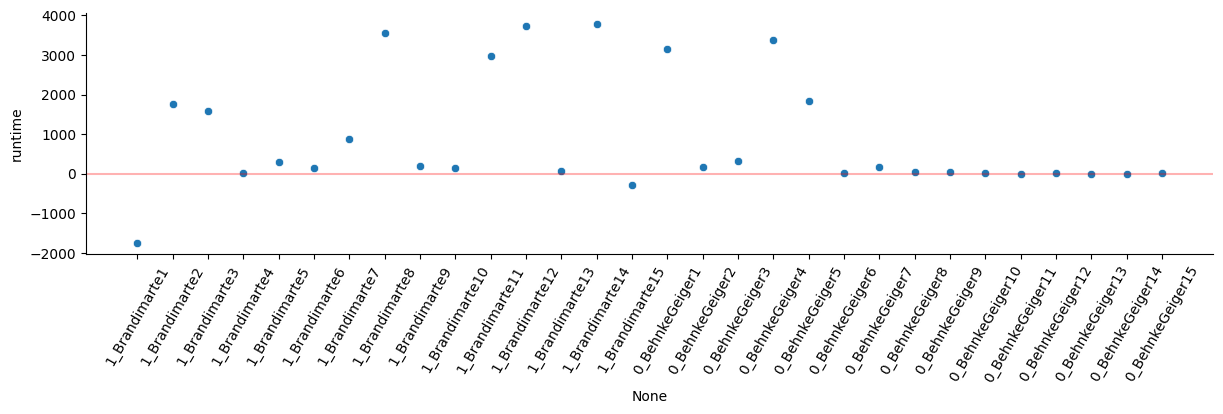

In [68]:
fg = sns.FacetGrid(data=both_df, aspect=4)
ax = sns.scatterplot(data=diff_df, x=diff_df.index, y='runtime')#.set_xticklabels(labels=diff_df.index, rotation=60)
ax.axhline(y=0, color='red', alpha=0.3)
fg.set_xticklabels(rotation=60)

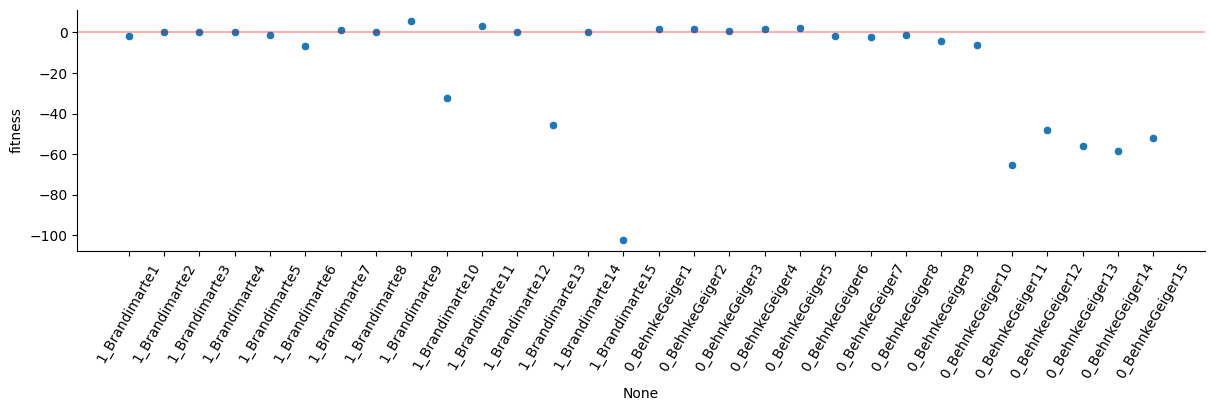

In [69]:
fg = sns.FacetGrid(data=both_df, aspect=4)
ax = sns.scatterplot(data=diff_df, x=diff_df.index, y='fitness')
ax.axhline(y=0, color='red', alpha=0.3)
fg.set_xticklabels(rotation=60)

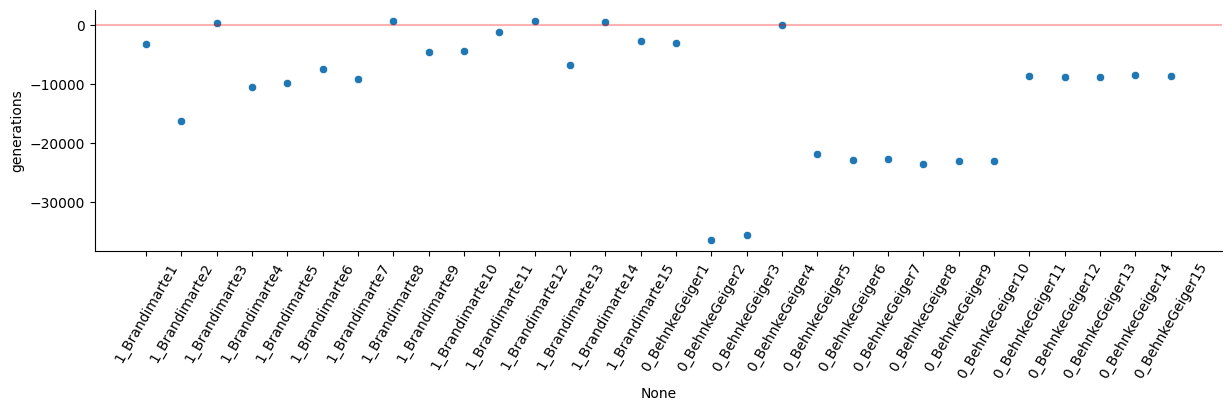

In [70]:
fg = sns.FacetGrid(data=both_df, aspect=4)
ax = sns.scatterplot(data=diff_df, x=diff_df.index, y='generations')
ax.axhline(y=0, color='red', alpha=0.3)
fg.set_xticklabels(rotation=60)

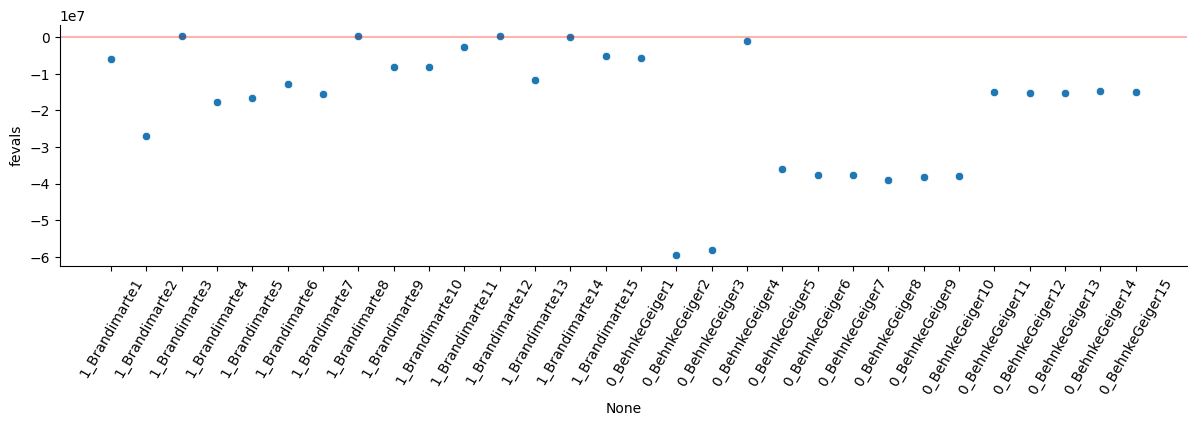

In [71]:
fg = sns.FacetGrid(data=both_df, aspect=4)
ax = sns.scatterplot(data=diff_df, x=diff_df.index, y='fevals')
ax.axhline(y=0, color='red', alpha=0.3)
fg.set_xticklabels(rotation=60)